# Minor Project : Sales Analysis
V1.0

![]("business.JPG")

![](business.JPG)

First of all we are going to import those libraries that we will use to perform our calculations , as we know pandas and numpy library are the most common libraries to use when we need to perform calculations over datasets like cleaning and ordering .

In [5]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

## Data Inspection 

Then out next step is import our datset in the format that we have it , in this case is a csv file for this reason we will use the function **pd.read_csv(r"path....")** this function allows us to import the dataset from csv file.

In [6]:
data = pd.read_csv(r"Sales_data.csv")

The function **.head()** allows us to see in table dataframe format the first five rows in our dataset 

In [7]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


The function **len()** have as purpose to five us the total quantity of rows in the dataset

In [8]:
len(data)

186850

If we are used to read the data in lineal algebra notation the function **.shape** is a good way to read it . 

In [9]:
data.shape

(186850, 6)

Also to know our column names the function **.columns** will be our best choice 

In [10]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [11]:
data.index

RangeIndex(start=0, stop=186850, step=1)

The function **.nunique()** shows us the unique values or data in each column 

In [12]:
data.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

If we need to know how a column is distributed in terms of his data we could use the function **.value_counts()**

In [13]:
data['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

If we need to know what are the data types used in our columns we can do that in two ways , with the function **.dtype**

In [14]:
data['Product'].dtype

dtype('O')

and with the function **info()**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Finally in our data inspection stage we will need our dataset as clean as possible and this involves the detection of null values and its cleaning trough the functions like **isnull.sum()** and **.dropna()** function. 

In [16]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [17]:
data.dropna(inplace=True)

## Questions and analysis 

### Question 1 : What was the best month for sales ? how much was earned that month ?

In [18]:
data['month']= data['Order Date'].str[0:2]
data['month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

The previous error was about a value error mismach because in the column month we had a string called "Or" for this reason we need to avoid this rows .

In [19]:
data[data['Order Date'].str[0:2]=='Or'][:5]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


Once we fix the error we proceed to extract the month of the date column and convert that into **string** format for extracting purposes and then we change the string data type into **int32** .

In [85]:
data = data[data['Order Date'].str[0:2]!='Or']
data['month']= data['Order Date'].str[0:2]
data['month'].astype('int32')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,09


The next step is create a dictionary who stores all the months in str and its number in the year this will help us to transform the month number type to a letter type through the **lambda function** and the function **apply** .

In [86]:
look_up = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Ago','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
data['month']=data['month'].apply(lambda x: look_up[x])

In [87]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


Since we saw the table **info()** we know all the columns have the datatype object for this reason we must change this data type to an appropiate type in this case **Quantity Ordered** must be a **int32** and **Price Each** must be **float** .

In [65]:
data['Quantity Ordered']= data['Quantity Ordered'].astype('int32')
data['Price Each'] = data['Price Each'].astype('float')
data['Sales']= data['Price Each']*data['Quantity Ordered']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


Once we have done this the next step is group the sales by month then we are going to apply the function **group by** and **sum()** for sum all the sales per month .

In [66]:
highest_sales = data.groupby('month').sum()
highest_sales

,Quantity Ordered,Price Each,Sales
month,,,
Ago,13448,2.230345e+06,2.244468e+06
Apr,20558,3.367671e+06,3.390670e+06
Dec,28114,4.588415e+06,4.613443e+06
Feb,13449,2.188885e+06,2.202022e+06
Jan,10903,1.811768e+06,1.822257e+06
Jul,16072,2.632540e+06,2.647776e+06
Jun,15253,2.562026e+06,2.577802e+06
Mar,17005,2.791208e+06,2.807100e+06
May,18667,3.135125e+06,3.152607e+06


Finally  we present the solution wether table or graphically, in this case we clearly can see the sales of december exceed all the other months .

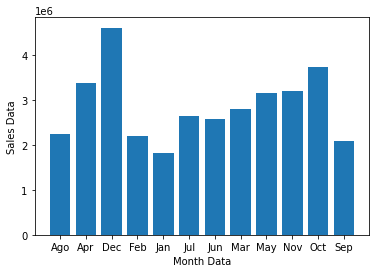

In [67]:
plt.figure()
plt.bar(highest_sales.index,highest_sales['Sales'])
plt.xlabel('Month Data')
plt.ylabel('Sales Data')
plt.show()

### Question 2 : What city sold the most product ?

We must check first our data to create and imagine the solution .

In [68]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In this case we must to extract the city from the adress in the column purchase address by use **lambda function** in the function we need to specify the function **split** special for strings and see what position belong to our target data in this case the position in the string "1" is the right choice . 

In [69]:
data['City'] = data['Purchase Address'].apply(lambda x : x.split(',')[1])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


Once we have done this , the next step is group by **City** and use the function *sum()* to add all the sales . 

In [70]:
best_city = data.groupby('City').sum()
best_city

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602,2.779908e+06,2.795499e+06
Austin,11153,1.809874e+06,1.819582e+06
Boston,22528,3.637410e+06,3.661642e+06
Dallas,16730,2.752628e+06,2.767975e+06
Los Angeles,33289,5.421435e+06,5.452571e+06
New York City,27932,4.635371e+06,4.664317e+06
Portland,14053,2.307747e+06,2.320491e+06
San Francisco,50239,8.211462e+06,8.262204e+06
Seattle,16553,2.733296e+06,2.747755e+06


We will present our results wether we want a table view or a plot view .

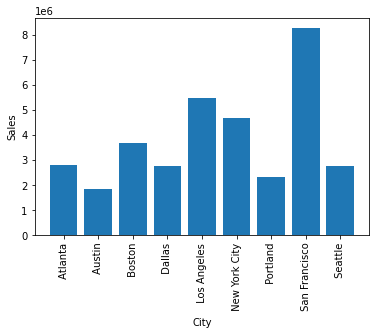

In [71]:
plt.figure()
plt.bar(best_city.index,best_city['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

### Question 3 : What times should we display advertisements to maximize likelihood of customer's buying products ?

First of all we need to extract the time from the Order Date column

In [72]:
data['Time'] = data['Order Date'].str[8:11]
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


And we are going to apply a groupby function with a sum function to group all times and its sales .

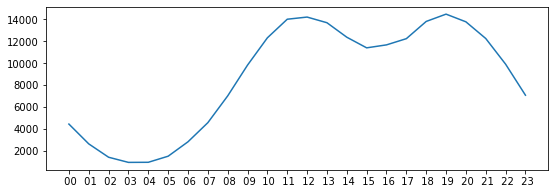

In [73]:
time_data = data.groupby('Time').sum()
plt.figure(figsize = (9,3))
plt.plot(time_data.index,time_data['Quantity Ordered'])
plt.show()

We have here two scenarios the first one is send ads to the customer after the 11:30 and 19:00 with the purpose of mantain the tendency of the purchases in that period of time because after those hours we can see a decrease in sales .

The other scenario is apply the adds in the early morning by sending offers that only will happen in the lapse of 23:00 and 5:00 to increase the tendency and move the minimum value of sales to a higher value .

This decision will depend only in the target of the marketing department .

In [74]:
min_time = data.groupby('Time').sum().sort_values('Sales',ascending=True)
min_time.head(5)

,Quantity Ordered,Price Each,Sales
Time,,,
03,928,144726.42,145757.89
04,937,162058.18,162661.01
05,1493,229621.21,230679.82
02,1398,233833.64,234851.44
06,2810,445000.11,448113.00


### Question 4 : What Products are most often sold together ?

First of all check the data that we have .

In [75]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In this case we must to identify what Order ID data are duplicated because this is a sign of multiple purchases that was done at the same time .

In [76]:
duplicated_data = data[data['Order ID'].duplicated(keep=False)]
duplicated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Time
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11


Then once we identify the duplicates we transform those records by applying a lambda function with a **join**

In [77]:
duplicated_data['product bundle'] = duplicated_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-77-9eabec29634c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_data['product bundle'] = duplicated_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


As we will see in the next table the last column specify what was the items purchased by a same Order ID

In [78]:
duplicated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Time,product bundle
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


Once we have done this we drop the duplicates between Order Id and product bundle and left those records that are unique .

In [79]:
duplicated_data = duplicated_data[['Order ID','product bundle']].drop_duplicates()
duplicated_data.head()

,Order ID,product bundle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


Finally to present our result we imported the modules collections and itertools with the purpose of count the items that were purchased together .

In [80]:
count = Counter() # Import from itertools 
for row in duplicated_data['product bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))##update is a method of collections and combinations from itertools 
count.most_common(10) # .most_common a function of collections .

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

As we saw the top 10 most purchased items are apple tech products by far . 

### Question 5 : What product sold the most ? why do you think it did ?

First of all we check out the data.

In [81]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In this step we summ all numeric columns of products after group by this column and use the function **sort_values** to sort the data by quantity .

In [82]:
most_sold = data.groupby('Product').sum().sort_values('Quantity Ordered',ascending = False)
most_sold.head()

,Quantity Ordered,Price Each,Sales
Product,,,
AAA Batteries (4-pack),31017,61716.59,92740.83
AA Batteries (4-pack),27635,79015.68,106118.40
USB-C Charging Cable,23975,261740.85,286501.25
Lightning Charging Cable,23217,323787.10,347094.15
Wired Headphones,20557,226395.18,246478.43


In this case we display the results graphically and conclude the AAA bateries are the most sold item in volume 

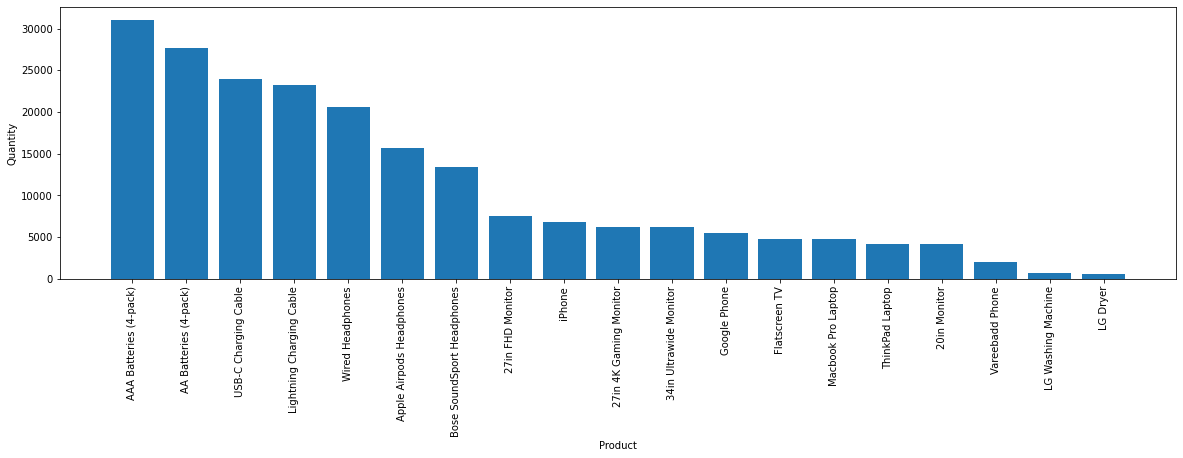

In [83]:
plt.figure(figsize = (20,5))
plt.bar(most_sold.index,most_sold['Quantity Ordered'])
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(rotation = 90 )
plt.show()

And in this plot we can observe while the batteries are the most sold item per quantity the mac book pro laptop is the most sold item by price surpassing all the other items by far .

<Figure size 720x216 with 0 Axes>

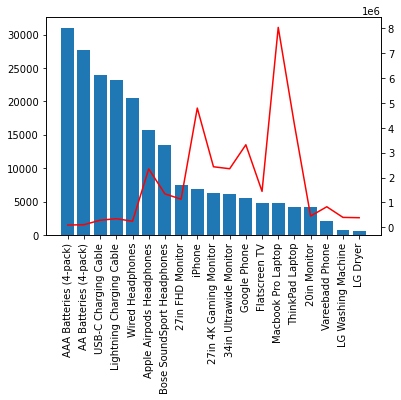

In [84]:
plt.figure(figsize = (10,3))
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1 .bar(most_sold.index,most_sold['Quantity Ordered'])
#ax1.tick_params(labelrotation=90)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(most_sold.index,most_sold['Sales'],color='r')
plt.show()